STAT 453: Deep Learning (Spring 2020)  

Instructor: Sebastian Raschka (sraschka@wisc.edu)  
Course website: http://pages.stat.wisc.edu/~sraschka/teaching/stat453-ss2020/  
GitHub repository: https://github.com/rasbt/stat453-deep-learning-ss20

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -v -p numpy

Sebastian Raschka 

CPython 3.7.1
IPython 7.12.0

numpy 1.18.1


# L03: Perceptron Convergence Experiment

Implementation of the classic Perceptron by Frank Rosenblatt for binary classification (here: 0/1 class labels) in NumPy

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Preparing a toy dataset

In [3]:
##########################
### DATASET
##########################

data = np.genfromtxt('perceptron_toydata.txt', delimiter='\t')
X, y = data[:, :2], data[:, 2]
y = y.astype(np.int)

print('Class label counts:', np.bincount(y))
print('X.shape:', X.shape)
print('y.shape:', y.shape)

# Shuffling & train/test split
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
X, y = X[shuffle_idx], y[shuffle_idx]

X_train, X_test = X[shuffle_idx[:70]], X[shuffle_idx[70:]]
y_train, y_test = y[shuffle_idx[:70]], y[shuffle_idx[70:]]

# Normalize (mean zero, unit variance)
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

Class label counts: [50 50]
X.shape: (100, 2)
y.shape: (100,)


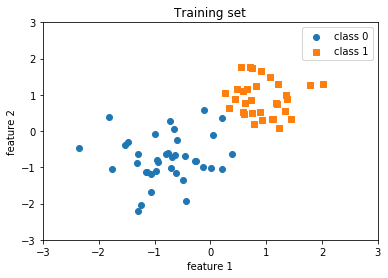

In [4]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

## Defining the Perceptron model

In [5]:
class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros((num_features, 1), dtype=np.float)
        self.bias = np.zeros(1, dtype=np.float)

    def forward(self, x):
        linear = np.dot(x, self.weights) + self.bias
        predictions = np.where(linear > 0., 1, 0)
        return predictions
        
    def backward(self, x, y):  
        predictions = self.forward(x)
        errors = y - predictions
        return errors
        
    def train(self, x, y, epochs):
        number_of_updates = 0
        for e in range(epochs):
            errors_made = 0
            
            for i in range(y.shape[0]):
                errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += (errors * x[i]).reshape(self.num_features, 1)
                self.bias += errors
                
                errors_made += np.sum(errors)
                number_of_updates += 1
                
            if not errors_made:
                return number_of_updates
                
    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = np.sum(predictions == y) / y.shape[0]
        return accuracy

## Training the Perceptron (original)

Model parameters:


  Weights: [[1.27340847]
 [1.34642288]]

  Bias: [-1.]

Train set accuracy: 100.00%
Number of iterations until convergence: 140


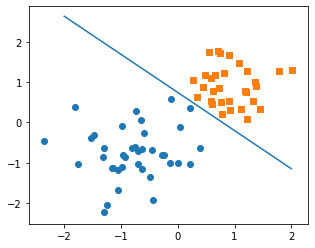

In [6]:
ppn = Perceptron(num_features=2)

number_iter = ppn.train(X_train, y_train, epochs=10000)

print('Model parameters:\n\n')
print('  Weights: %s\n' % ppn.weights)
print('  Bias: %s\n' % ppn.bias)


########


train_acc = ppn.evaluate(X_train, y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))

print('Number of iterations until convergence: %d' % number_iter)

w, b = ppn.weights, ppn.bias

x_min = -2
y_min = ( (-(w[0] * x_min) - b[0]) 
          / w[1] )

x_max = 2
y_max = ( (-(w[0] * x_max) - b[0]) 
          / w[1] )


fig, ax = plt.subplots(1, 1, sharex=True, figsize=(5, 4))

ax.plot([x_min, x_max], [y_min, y_max])
ax.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')
plt.show()

## Training the Perceptron with inputs that were multiplied by 10

Model parameters:


  Weights: [[6.43784834]
 [1.59421666]]

  Bias: [-22.]

Train set accuracy: 100.00%
Number of iterations until convergence: 840


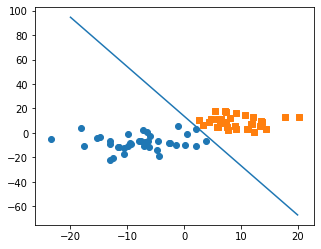

In [7]:
ppn = Perceptron(num_features=2)

X_train[:, 0] *= 10
X_train[:, 1] *= 10

number_iter = ppn.train(X_train, y_train, epochs=10000)

print('Model parameters:\n\n')
print('  Weights: %s\n' % ppn.weights)
print('  Bias: %s\n' % ppn.bias)


########


train_acc = ppn.evaluate(X_train, y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))

print('Number of iterations until convergence: %d' % number_iter)

w, b = ppn.weights, ppn.bias

x_min = -20
y_min = ( (-(w[0] * x_min) - b[0]) 
          / w[1] )

x_max = 20
y_max = ( (-(w[0] * x_max) - b[0]) 
          / w[1] )


fig, ax = plt.subplots(1, 1, sharex=True, figsize=(5, 4))

ax.plot([x_min, x_max], [y_min, y_max])
ax.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')
plt.show()